# Proyek Analisis Data: Nama dataset
- Nama:Rizki Dwi Novita
- Email:rizkidwinovita2@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1.
 Bagaimana tingkat polusi PM2.5 dan PM10 pada setiap stasiun?
- pertanyaan 2.
Seperti apa hubungan antara tingkat polusi (SO2, NO2, CO) dan faktor cuaca (TEMP, PRES, DEWP) pada seluruh stasiun?
- pertanyaan 3.
Bagaimana tingkat O3 (Ozon) selama 2013-2017?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
air_quality = ['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

data_frames = []

for csv_file in air_quality:
    file_path = f'D:/2. Coding dll/3. Dicoding/5. Data Science/dashboard/air_quality/{csv_file}'
    df = pd.read_csv(file_path)
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

print(combined_df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


### Assessing Data

#### Menilai tabel `combined_df`

In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [4]:
###missing_values = combined_df.isna().sum()
###print(missing_values)
combined_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", combined_df.duplicated().sum())
combined_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

#### Membersihkan tabel `combined_df`

##### Missing values

In [6]:
missing_values = combined_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].isna()
missing_data = combined_df[missing_values]

missing_values_sum = missing_values.sum()
print(missing_values_sum)


PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
wd        1822
WSPM       318
dtype: int64


In [7]:
for column in combined_df.columns[5:18]:  # Memilih kolom 'PM2.5' hingga 'WSPM'
    print(f"Value counts for {column}:\n{combined_df[column].value_counts()}\n")


Value counts for PM2.5:
PM2.5
3.0      8810
10.0     7088
9.0      6886
8.0      6836
11.0     6831
         ... 
70.7        1
123.7       1
48.8        1
114.6       1
823.0       1
Name: count, Length: 888, dtype: int64

Value counts for PM10:
PM10
6.0      4945
18.0     3748
5.0      3731
14.0     3725
16.0     3616
         ... 
15.9        1
40.3        1
315.1       1
134.1       1
950.0       1
Name: count, Length: 1084, dtype: int64

Value counts for SO2:
SO2
2.0000      98557
3.0000      32784
4.0000      21716
5.0000      17964
6.0000      16567
            ...  
274.0000        1
238.0000        1
293.0000        1
83.1096         1
236.0000        1
Name: count, Length: 691, dtype: int64

Value counts for NO2:
NO2
16.0     5799
22.0     5755
20.0     5718
17.0     5690
18.0     5676
         ... 
50.6        1
34.8        1
21.7        1
27.7        1
112.8       1
Name: count, Length: 1212, dtype: int64

Value counts for CO:
CO
300.0     32308
400.0     31275
500.0     29

In [8]:
for column in combined_df.columns[5:18]:
    if combined_df[column].dtype == 'float64':  # Periksa apakah tipe data kolom adalah numerik
        combined_df[column].fillna(combined_df[column].mean(), inplace=True)
    else:
        print(f"Skipped filling missing values for non-numeric column: {column}")


Skipped filling missing values for non-numeric column: wd
Skipped filling missing values for non-numeric column: station


In [9]:
# Pengisian nilai rata-rata untuk kolom numerik
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for column in numeric_columns:
    combined_df[column].fillna(combined_df[column].mean(), inplace=True)

# Pengisian nilai modus untuk kolom kategori 'wd'
combined_df['wd'].fillna(combined_df['wd'].mode()[0], inplace=True)

In [10]:
###missing_values = combined_df.isna().sum()
###print(missing_values)
combined_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [11]:
# Contoh dataframe
data = {'year': [2013, 2014, 2015, 2016, 2017, 2013.5, 2014.5],
        'PM2.5': [20, 25, 18, 22, 30, 21, 27],
        'PM10': [40, 45, 38, 42, 50, 41, 47]}

df = pd.DataFrame(data)

# Cek nilai unik dalam kolom 'year'
unique_values = df['year'].unique()

# Jika terdapat nilai desimal, tampilkan pesan peringatan
if any(val % 1 != 0 for val in unique_values):
    print("Peringatan: Kolom 'year' mengandung nilai desimal.")

# Konversi kolom 'year' ke tipe data integer
df['year'] = df['year'].astype(int)

# Tampilkan hasil
print(df)


Peringatan: Kolom 'year' mengandung nilai desimal.
   year  PM2.5  PM10
0  2013     20    40
1  2014     25    45
2  2015     18    38
3  2016     22    42
4  2017     30    50
5  2013     21    41
6  2014     27    47


## Exploratory Data Analysis (EDA)

### Explore `combined_df`

In [12]:
combined_df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
108493,3302,2013,7,16,13,5.0,5.0,15.830835,8.0067,1230.766454,92.0,32.1,996.5,12.3,0.0,E,1.9,Dongsi
180490,5171,2013,10,2,10,7.0,29.0,7.000000,21.0000,300.000000,50.0,21.2,1015.6,2.9,0.0,E,0.8,Gucheng
142035,1780,2013,5,14,3,77.0,185.0,30.000000,79.0000,500.000000,42.0,14.5,1000.1,6.6,0.0,W,0.6,Guanyuan
292550,12039,2014,7,15,14,52.0,84.0,6.000000,13.0000,600.000000,214.0,31.5,999.4,17.4,0.0,SW,2.5,Shunyi
408168,22465,2015,9,23,0,43.0,43.0,2.000000,47.0000,1000.000000,37.0,16.7,1006.0,15.4,0.0,ENE,1.0,Wanshouxigong
192580,17261,2015,2,18,4,14.0,14.0,10.000000,11.0000,800.000000,60.0,-1.0,1018.0,-9.4,0.0,NE,0.2,Gucheng
62047,26984,2016,3,29,7,14.0,38.0,5.000000,39.0000,600.000000,36.0,8.5,1008.9,-5.7,0.0,NNW,1.4,Changping
393312,7609,2014,1,12,0,42.0,74.0,30.000000,64.0000,900.000000,11.0,0.4,1026.2,-19.4,0.0,ENE,0.3,Wanshouxigong
380803,30164,2016,8,8,19,24.0,38.0,2.000000,34.0000,700.000000,139.0,29.5,1002.7,18.3,0.0,SSW,2.0,Wanliu
292191,11680,2014,6,30,15,63.0,170.0,15.830835,14.0000,800.000000,224.0,34.9,1000.4,15.3,0.0,S,2.9,Shunyi


In [13]:
combined_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,79.978679,91.066422,21.417257,34.618463,1131.283304,55.760484,11.430729,10.469162,13.787240,0.820624,NaN,1.245914,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [14]:
# Group by 'station' and calculate the mean and max of 'PM2.5' and 'PM10'
pollution_stats = combined_df.groupby('station').agg({'PM2.5': ['mean', 'max'], 'PM10': ['mean', 'max']})

# Flatten the column index
pollution_stats.columns = ['_'.join(col).strip() for col in pollution_stats.columns.values]

print(pollution_stats)


               PM2.5_mean  PM2.5_max   PM10_mean  PM10_max
station                                                   
Aotizhongxin    82.694993      898.0  109.948633     984.0
Changping       71.291647      882.0   94.822936     999.0
Dingling        66.296172      881.0   84.130040     905.0
Dongsi          86.057386      737.0  110.246308     955.0
Guanyuan        82.878210      680.0  108.969217     999.0
Gucheng         83.777314      770.0  118.707038     994.0
Huairou         69.902696      762.0   91.773421     993.0
Nongzhanguan    84.748126      844.0  108.936027     995.0
Shunyi          79.499461      941.0   98.828697     999.0
Tiantan         82.119124      821.0  106.333689     988.0
Wanliu          83.335700      957.0  110.417138     951.0
Wanshouxigong   84.920309      999.0  112.118266     961.0


In [15]:
# Mengelompokkan data berdasarkan 'station' dan 'year', kemudian menghitung nilai rata-rata dan maksimum O3
o3_mean = combined_df.groupby(['station', 'year'])['O3'].mean().reset_index()
o3_max = combined_df.groupby(['station', 'year'])['O3'].max().reset_index()

# Menemukan baris dengan nilai O3 rata-rata tertinggi dan nilai O3 maksimum tertinggi untuk setiap stasiun
max_o3_mean = o3_mean.loc[o3_mean.groupby('station')['O3'].idxmax()]
max_o3_max = o3_max.loc[o3_max.groupby('station')['O3'].idxmax()]

# Menampilkan data
print("Tahun dengan rata-rata O3 tertinggi untuk setiap stasiun:")
print(max_o3_mean)
print("\nTahun dengan nilai maksimum O3 tertinggi untuk setiap stasiun:")
print(max_o3_max)


Tahun dengan rata-rata O3 tertinggi untuk setiap stasiun:
          station  year         O3
2    Aotizhongxin  2015  63.778188
6       Changping  2014  63.065953
11       Dingling  2014  72.125036
15         Dongsi  2013  63.492620
20       Guanyuan  2013  58.343131
27        Gucheng  2015  60.662706
31        Huairou  2014  66.912357
37   Nongzhanguan  2015  61.198991
41         Shunyi  2014  58.398844
47        Tiantan  2015  60.090705
53         Wanliu  2016  53.736391
57  Wanshouxigong  2015  58.898719

Tahun dengan nilai maksimum O3 tertinggi untuk setiap stasiun:
          station  year         O3
2    Aotizhongxin  2015   423.0000
5       Changping  2013   429.0000
13       Dingling  2016   500.0000
15         Dongsi  2013  1071.0000
24       Guanyuan  2017   415.0000
27        Gucheng  2015   450.0000
30        Huairou  2013   444.0000
38   Nongzhanguan  2016   390.0000
40         Shunyi  2013   351.7164
45        Tiantan  2013   674.0000
52         Wanliu  2015   364.0000
55 

## Visualization & Explanatory Analysis

### Pertanyaan 1:

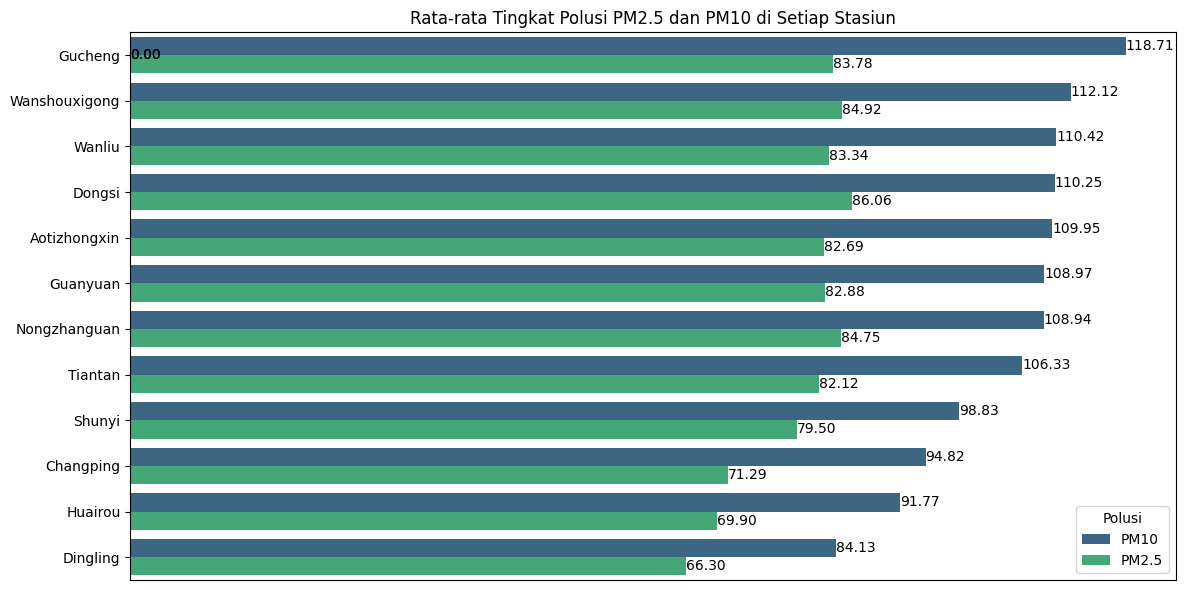

In [16]:
# Ambil data stasiun dan tingkat polusi dari dataframe
station_pollution = combined_df[['station', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]

# Hitung rata-rata tingkat polusi di setiap stasiun
average_pollution = station_pollution.groupby('station').mean()

# Melt dataframe untuk mempermudah visualisasi
melted_pollution = pd.melt(average_pollution.reset_index(), id_vars='station', value_vars=['PM2.5', 'PM10'], var_name='Polusi', value_name='Rata-rata')

# Sorting stasiun berdasarkan rata-rata PM2.5 (atau parameter lain yang Anda pilih)
sorted_stations = melted_pollution.sort_values(by='Rata-rata', ascending=False)

# Visualisasi Bar Chart grup untuk PM2.5 dan PM10
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Rata-rata', y='station', hue='Polusi', data=sorted_stations, palette='viridis')

# Menambahkan label pada setiap batang
for p in barplot.patches:
    width = p.get_width()    # get bar length
    barplot.text(width,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

plt.title('Rata-rata Tingkat Polusi PM2.5 dan PM10 di Setiap Stasiun')
plt.xlabel('')  # Menghapus label sumbu x
plt.ylabel('')  # Menghapus label sumbu y
plt.xticks([])  # Menghapus nilai-nilai pada sumbu x
plt.tight_layout()
plt.show()


### Pertanyaan 2:

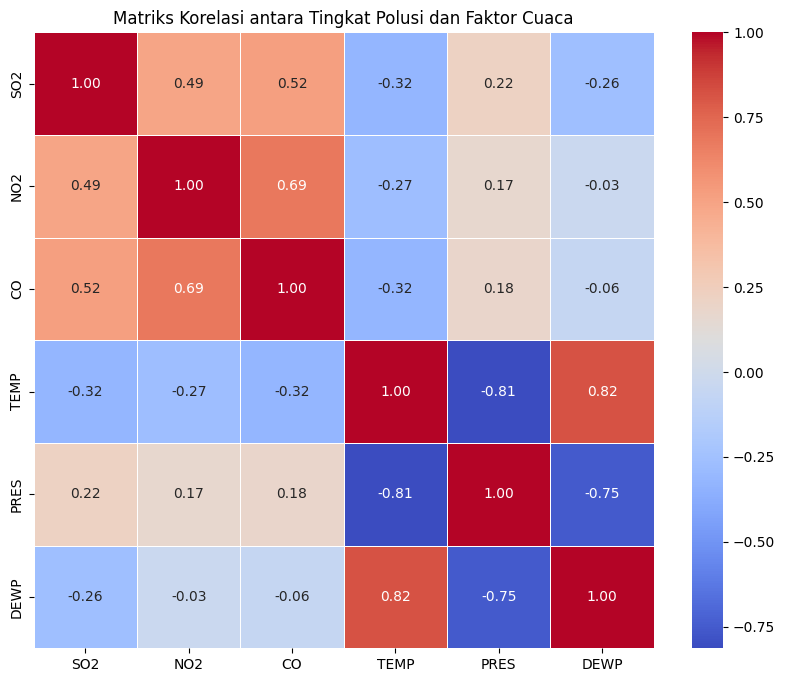

In [17]:
# Ambil data tingkat polusi dan faktor cuaca
correlation_data = combined_df[['SO2', 'NO2', 'CO', 'TEMP', 'PRES', 'DEWP']]

# Hitung matriks korelasi
correlation_matrix = correlation_data.corr()

# Visualisasi heatmap matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriks Korelasi antara Tingkat Polusi dan Faktor Cuaca')
plt.show()


In [18]:
print(correlation_matrix.loc['SO2', 'NO2'])

0.4911090559537009


### Pertanyaan 3:

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


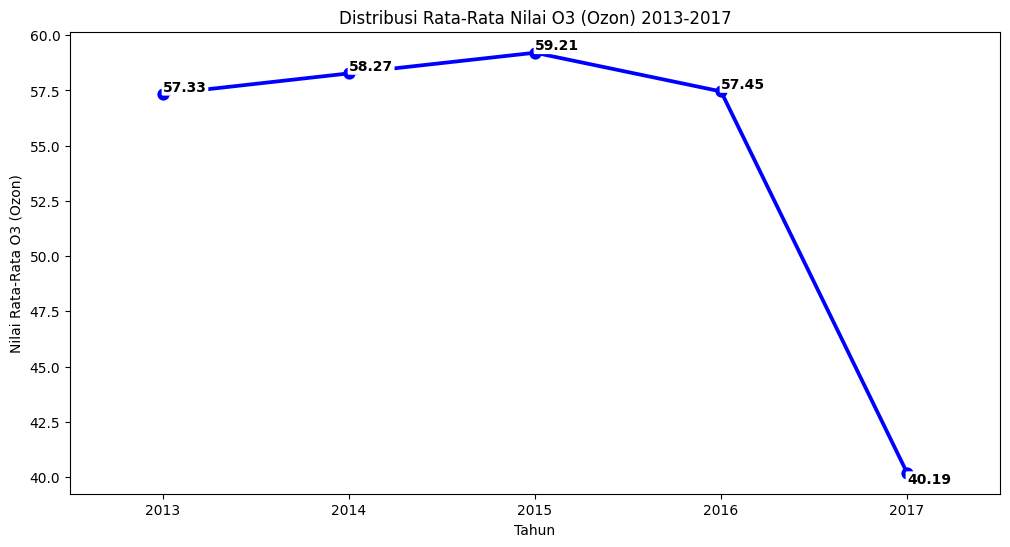

In [19]:
# Hitung rata-rata (mean) nilai O3 per tahun
mean_ozone_per_year = combined_df.groupby('year')['O3'].mean().reset_index()

# Urutkan hasil berdasarkan tahun secara menurun
sorted_ozone_data = mean_ozone_per_year.sort_values(by='year', ascending=False)

# Visualisasi menggunakan pointplot
plt.figure(figsize=(12, 6))
pointplot = sns.pointplot(x='year', y='O3', data=sorted_ozone_data, color='blue')

# Tambahkan label nilai pada setiap titik pada garis dengan offset kecil
for line in pointplot.lines:
    for xdata, ydata in zip(line.get_xdata(), line.get_ydata()):
        # Menyesuaikan posisi teks label berdasarkan nilai y
        va = 'bottom' if ydata > sorted_ozone_data['O3'].mean() else 'top'
        # Menambahkan background putih ke label
        pointplot.text(xdata, ydata, f'{ydata:.2f}', color='black', weight='semibold',
                       horizontalalignment='left', verticalalignment=va,
                       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))

plt.title('Distribusi Rata-Rata Nilai O3 (Ozon) 2013-2017')
plt.xlabel('Tahun')
plt.ylabel('Nilai Rata-Rata O3 (Ozon)')
plt.show()


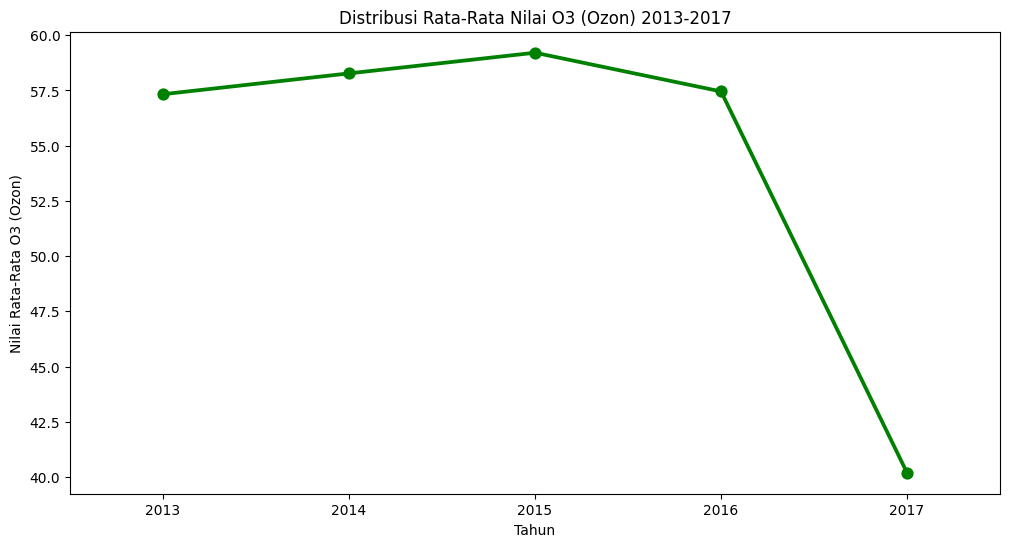

In [20]:
# Hitung rata-rata (mean) nilai O3 per tahun
mean_ozone_per_year = combined_df.groupby('year')['O3'].mean().reset_index()

# Urutkan hasil berdasarkan tahun secara menurun
sorted_ozone_data = mean_ozone_per_year.sort_values(by='year', ascending=False)

# Visualisasi menggunakan pointplot
plt.figure(figsize=(12, 6))
sns.pointplot(x='year', y='O3', data=sorted_ozone_data, color='green')
plt.title('Distribusi Rata-Rata Nilai O3 (Ozon) 2013-2017')
plt.xlabel('Tahun')
plt.ylabel('Nilai Rata-Rata O3 (Ozon)')
plt.show()


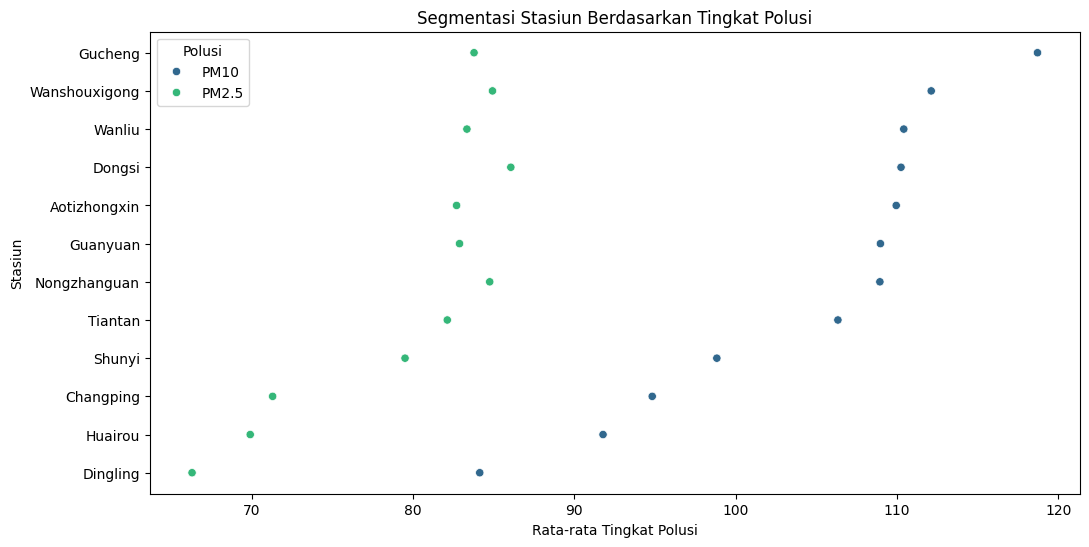

In [21]:
# Ambil data stasiun dan tingkat polusi dari dataframe
station_pollution = combined_df[['station', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]

# Hitung rata-rata tingkat polusi di setiap stasiun
average_pollution = station_pollution.groupby('station').mean()

# Melt dataframe untuk mempermudah visualisasi
melted_pollution = pd.melt(average_pollution.reset_index(), id_vars='station', value_vars=['PM2.5', 'PM10'], var_name='Polusi', value_name='Rata-rata')

# Sorting stasiun berdasarkan rata-rata PM2.5 (atau parameter lain yang Anda pilih)
sorted_stations = melted_pollution.sort_values(by='Rata-rata', ascending=False)

# Visualisasi Scatter Plot
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x='Rata-rata', y='station', hue='Polusi', data=sorted_stations, palette='viridis')
plt.title('Segmentasi Stasiun Berdasarkan Tingkat Polusi')
plt.xlabel('Rata-rata Tingkat Polusi')
plt.ylabel('Stasiun')
plt.show()


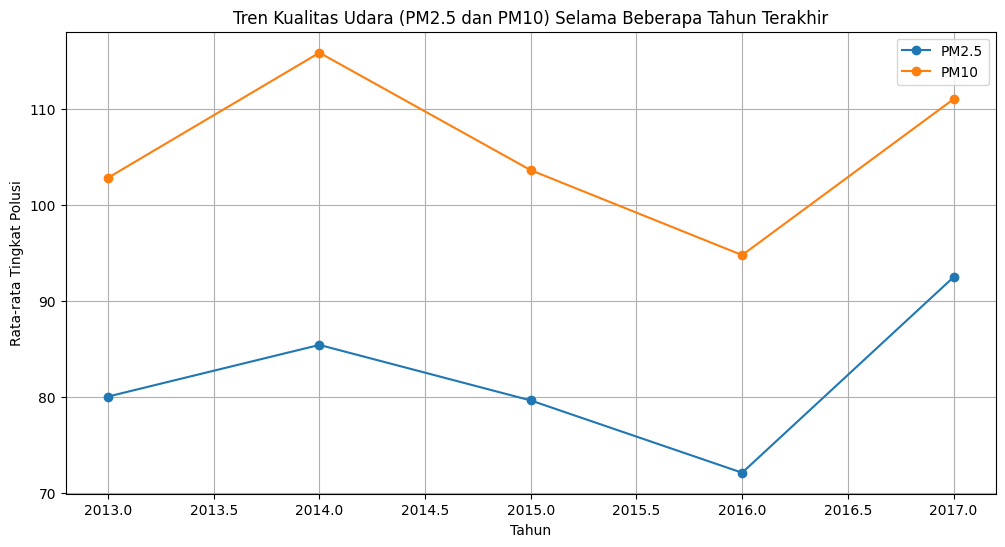

In [22]:
# Ambil data PM2.5 dan PM10
pm_data = combined_df[['year', 'PM2.5', 'PM10']]

# Hitung rata-rata PM2.5 dan PM10 per tahun
average_pm_per_year = pm_data.groupby('year').mean()

# Visualisasi time series plot
plt.figure(figsize=(12, 6))
plt.plot(average_pm_per_year.index, average_pm_per_year['PM2.5'], label='PM2.5', marker='o')
plt.plot(average_pm_per_year.index, average_pm_per_year['PM10'], label='PM10', marker='o')

# Set label dan judul
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.title('Tren Kualitas Udara (PM2.5 dan PM10) Selama Beberapa Tahun Terakhir')
plt.legend()
plt.grid(True)
plt.show()


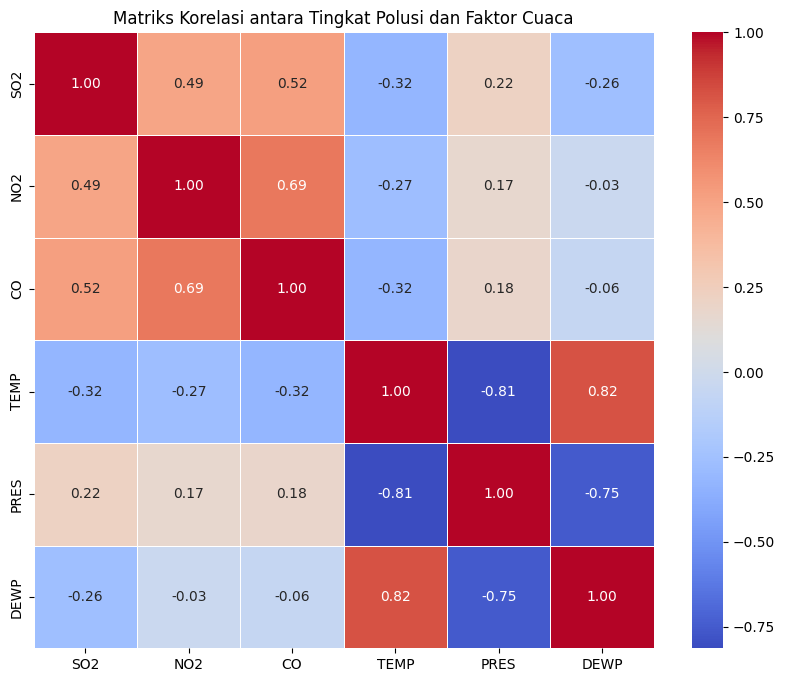

In [23]:
# Ambil data tingkat polusi dan faktor cuaca dari dataframe
pollution_weather_data = combined_df[['SO2', 'NO2', 'CO', 'TEMP', 'PRES', 'DEWP']]

# Buat matriks korelasi
correlation_matrix = pollution_weather_data.corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriks Korelasi antara Tingkat Polusi dan Faktor Cuaca')
plt.show()


## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2